<a href="https://colab.research.google.com/github/SidiMohamedAJ/Machine_learning-and-Deep_learning-Projects/blob/main/Simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Pre-traitement de donnees**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
url = '/content/drive/MyDrive/Colab Notebooks/Deep Learning/iris_dataset.csv'
data = pd.read_csv(url)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data['target'].value_counts()

target
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [ ]:
data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [ ]:
data['target'] = data['target'].replace('Iris-setosa', 0)
data['target'] = data['target'].replace('Iris-versicolor', 1)
data['target'] = data['target'].replace('Iris-virginica', 2)

In [ ]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X = data.drop('target', axis=1)
y = data['target']

In [ ]:
X = X.values
y = y.values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

##**Neural Network Model**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Model(nn.Module):

  def __init__(self, in_features= X_train.shape[1], h1=20, h2=30, out_features=3):
    super(Model, self).__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [ ]:
torch.manual_seed(42)

model = Model()

In [ ]:
# Convert X_train and X_test to tensors float
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [ ]:
# Convert y_train and y_test to tonsors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

##**Train the Model**

In [ ]:
EPOCHS = 50
losses =[]

for i in range(1, EPOCHS+1):
  y_pred = model(X_train)

  #Calculer l'erreur
  loss = criterion(y_pred, y_train)

  losses.append(loss.item())

  #Back Propogation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #afficher chaque 10 epoches l'erreur

  if i % 10 == 0:
    print(f'Epoch : {i} , loss : {loss.item():.4f}')

Epoch : 10 , loss : 0.7413
Epoch : 20 , loss : 0.4386
Epoch : 30 , loss : 0.1978
Epoch : 40 , loss : 0.0511
Epoch : 50 , loss : 0.0172


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Epoch')

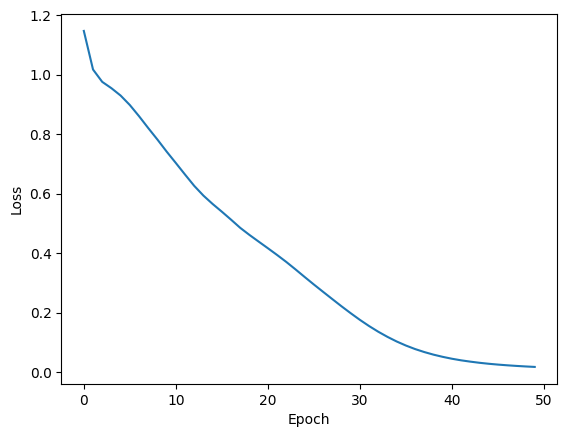

In [ ]:
plt.plot(range(EPOCHS), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

**Test Model**

In [ ]:
# Mettez votre modèle en mode évaluation
model.eval()

# Faites des prédictions sur l'ensemble de données de test
with torch.no_grad():
    y_pred_test = model(X_test)

# Calculez l'erreur sur l'ensemble de données de test
test_loss = criterion(y_pred_test, y_test)

print(f'Erreur sur l\'ensemble de données de test : {test_loss.item():.4f}')


Erreur sur l'ensemble de données de test : 0.0821
